<a href="https://colab.research.google.com/github/aishwaryabadge/Lead-scoring-case-study/blob/main/Help%20international.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
country_df = pd.read_csv('/content/drive/MyDrive/Data Science projects/Help International  Humanitarian /Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
country_df.shape

(167, 10)

In [6]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Data cleaning

In [8]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- Every column has appropriate datatype and also no null values are present , therefore not conversion is needed here.

In [9]:
# Checking for duplicates
country_df.duplicated(subset=None).head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

- No data cleaning is required as such since no duplicates , no null values and improper datatypes are present.

In [10]:
# converting import ,export and health values to their actual values
country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] *country_df['gdpp']/100
country_df['health'] =country_df['health'] * country_df['gdpp']/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


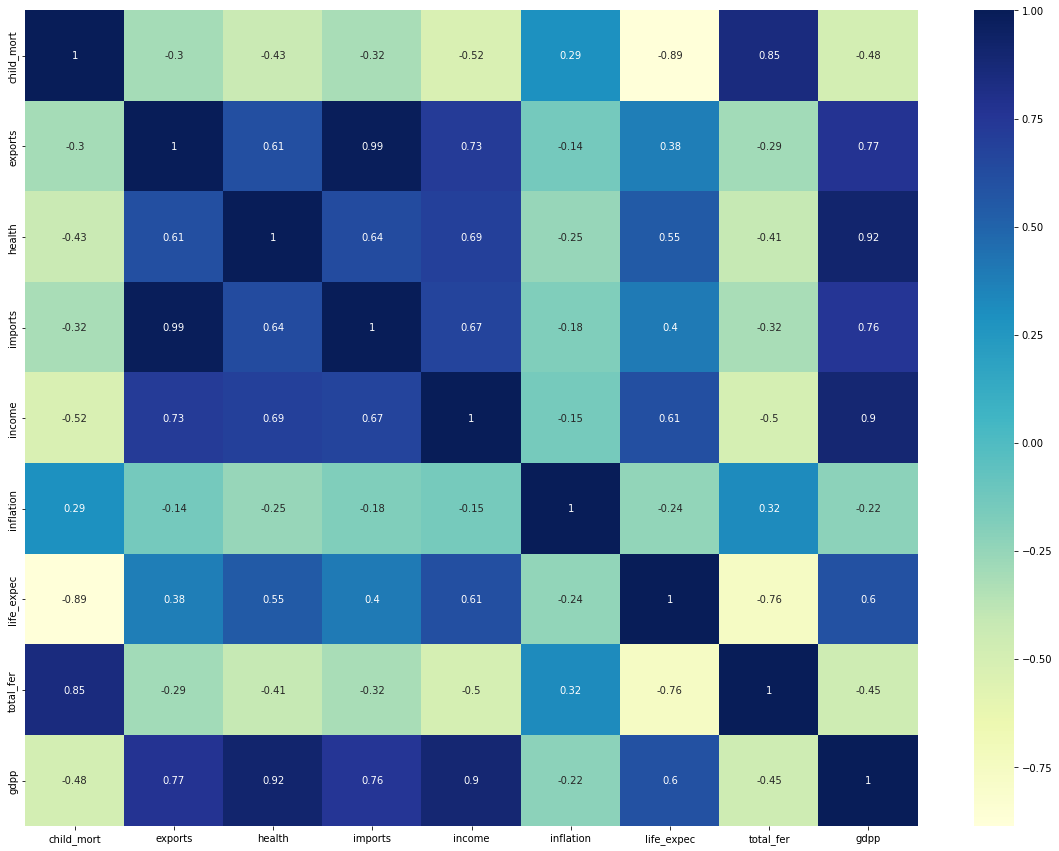

In [11]:
# looking for the correlation among all the countries
plt.figure(figsize=(20,15))
sns.heatmap(country_df.corr(),annot=True, cmap="YlGnBu")
plt.show()


#### Inferences  drawn from above heatmap
- Income and Gdpp are highly correlated with the corelation value of 0.9
- Child_mortality and total_fertility are highly correlated with the value of 0.85
- Import and exports are also  correlated with good correlation value of 0.74
- child_mortality and life_expect are highly negatively correlated with the value of -0.89
- life_expec and total_fertility are  negatively correlated with the valye of -0.76

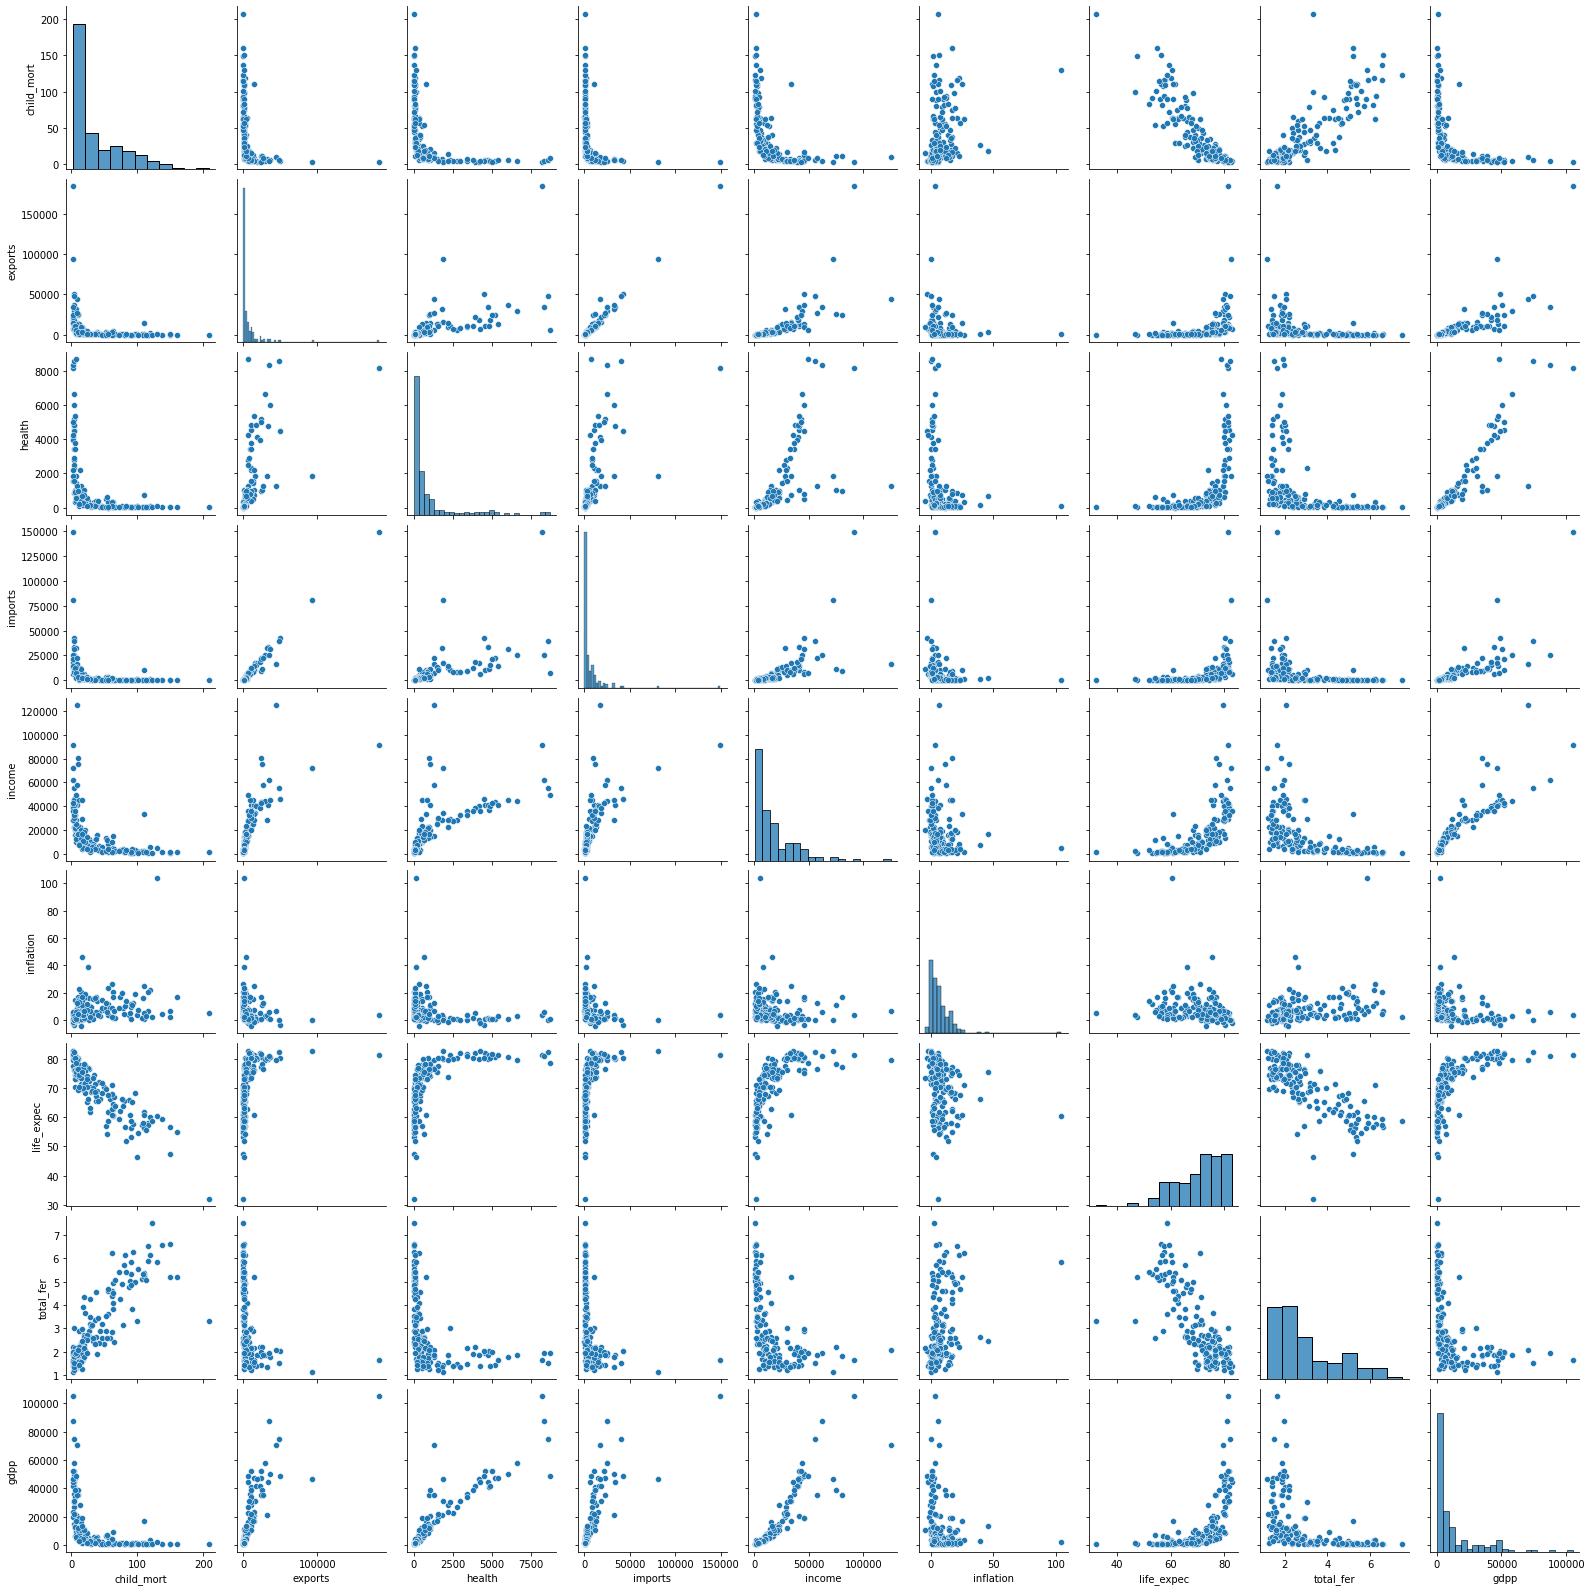

In [12]:

sns.pairplot(country_df)
plt.show()


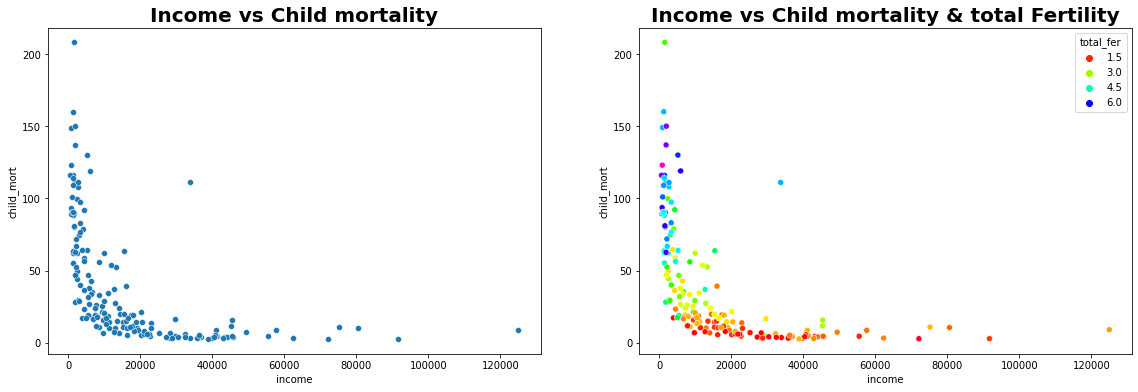

In [13]:
# income vs child_mortality
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='income',y='child_mort', data=country_df)
plt.title('Income vs Child mortality',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='income',y='child_mort',hue='total_fer', data=country_df, palette='gist_rainbow')
plt.title('Income vs Child mortality & total Fertility',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()



- From above graphs we observe that 
- 1.For low income the child mortality is high
- 2 For low income total_fer rate is high.
- 3.As child mortality increases the total_fer has also increased.

In [14]:
# Country vs Income
Income = country_df.groupby(['country'])['income'].sum().sort_values(ascending=False)
Income = pd.DataFrame(Income)

Highest_Income = Income.head()
Lowest_Income = Income.tail()

display(Highest_Income)
display(Lowest_Income)


,income
country,
Qatar,125000
Luxembourg,91700
Brunei,80600
Kuwait,75200
Singapore,72100


,income
country,
Central African Republic,888
Niger,814
Burundi,764
Liberia,700
"Congo, Dem. Rep.",609


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


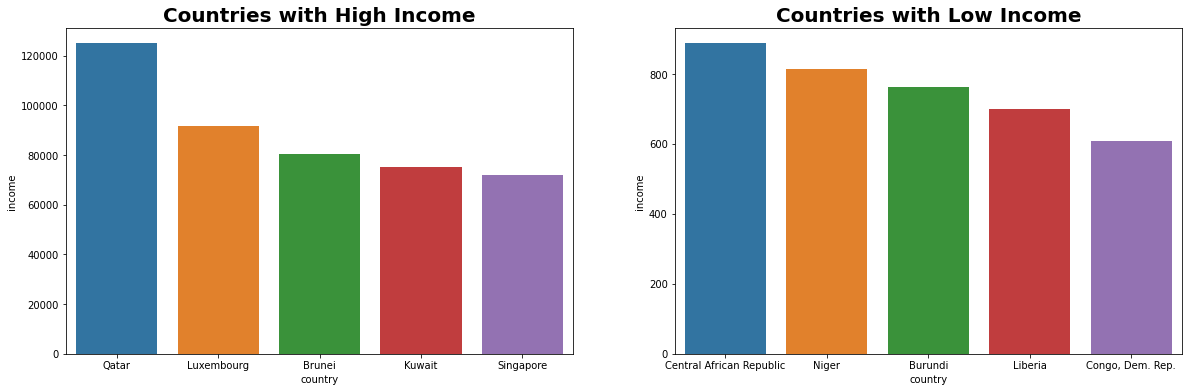

In [15]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.barplot(Highest_Income.index,Highest_Income.income)
plt.title("Countries with High Income",fontweight='bold',size=20)

plt.subplot(1,2,2)
sns.barplot(Lowest_Income.index,Lowest_Income.income)
plt.title("Countries with Low Income",fontweight='bold',size=20)

plt.show()

- The above graph shows that the income of country Qatar is very high whereas, that of Congo,Dem.Rep. is very less


In [16]:
Child_mortality = country_df.groupby(['country'])['child_mort'].sum().sort_values(ascending=False)
Child_mortality  = pd.DataFrame(Child_mortality)

Highest_Child_mortality = Child_mortality.head()
Lowest_Child_mortality = Child_mortality.tail()

#display(Highest_Child_mortality)
#display(Lowest_Child_mortality)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


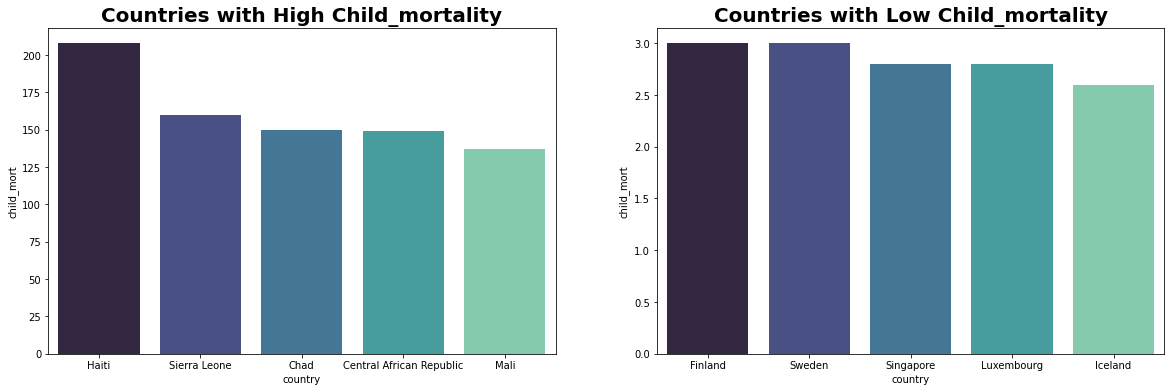

In [17]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.barplot(Highest_Child_mortality.index,Highest_Child_mortality.child_mort,palette='mako')
plt.title("Countries with High Child_mortality",fontweight='bold',size=20)

plt.subplot(1,2,2)
sns.barplot(Lowest_Child_mortality.index,Lowest_Child_mortality.child_mort,palette='mako')
plt.title("Countries with Low Child_mortality",fontweight='bold',size=20)

plt.show()

- Haiti has high child mortality rate
- Iceland has least child mortality rate 

In [18]:
gdpp = country_df.groupby(['country'])['gdpp'].sum().sort_values(ascending=False)
gdpp = pd.DataFrame(gdpp)

Highest_gdpp = gdpp.head()
Lowest_gdpp = gdpp.tail()

#display(Highest_gdpp)
#display(Lowest_gdpp)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


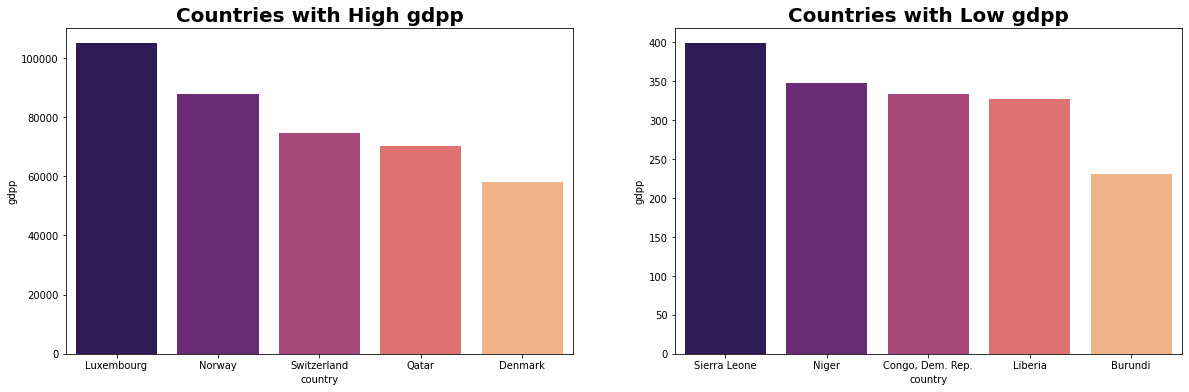

In [19]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.barplot(Highest_gdpp.index,Highest_gdpp.gdpp,palette='magma')
plt.title("Countries with High gdpp",fontweight='bold',size=20)

plt.subplot(1,2,2)
sns.barplot(Lowest_gdpp.index,Lowest_gdpp.gdpp,palette='magma')
plt.title("Countries with Low gdpp",fontweight='bold',size=20)

plt.show()

- Here Luxembourg has highest GDP whereas Burundi has lowest.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


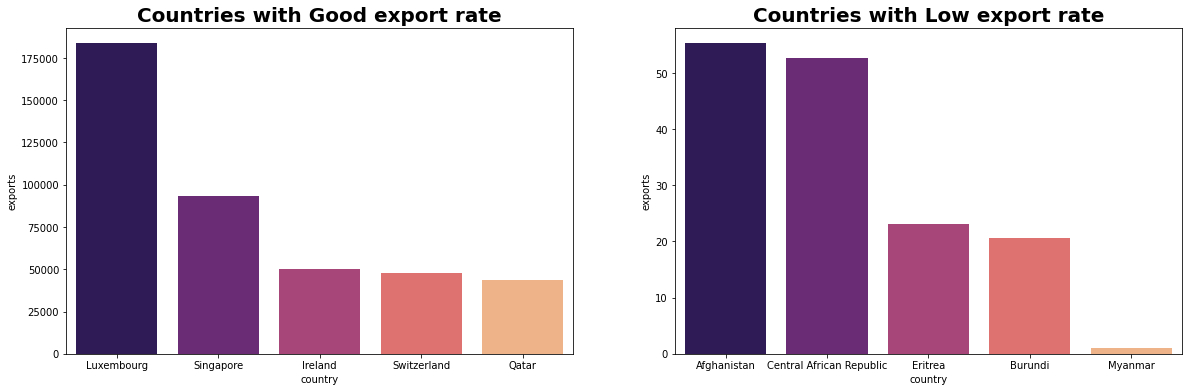

In [20]:
Export = country_df.groupby(['country'])['exports'].sum().sort_values(ascending=False)
Export = pd.DataFrame(Export)

Highest_Export =Export.head()
Lowest_Export = Export.tail()

#display(Highest_Export)
#display(Lowest_Export)

plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.barplot(Highest_Export.index,Highest_Export.exports,palette='magma')
plt.title("Countries with Good export rate",fontweight='bold',size=20)

plt.subplot(1,2,2)
sns.barplot(Lowest_Export.index,Lowest_Export.exports,palette='magma')
plt.title("Countries with Low export rate",fontweight='bold',size=20)

plt.show()

- Here we observe that country having Good export rate has highest GDP.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


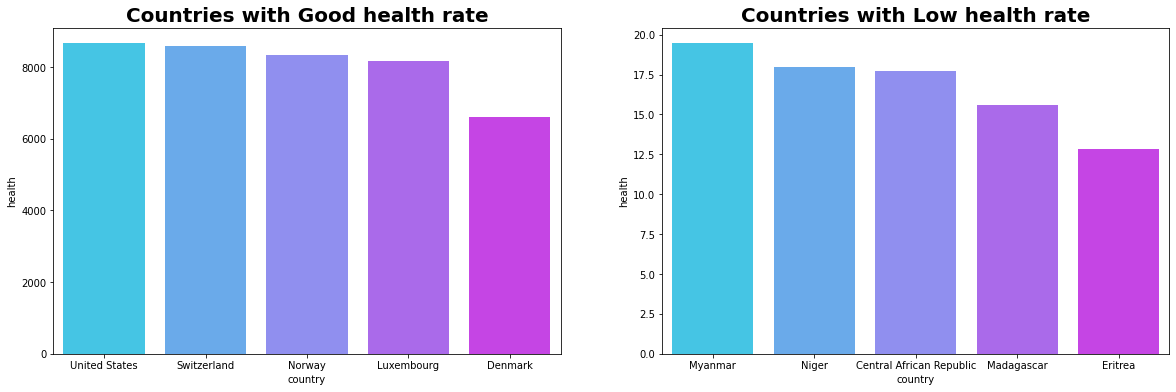

In [21]:
Health = country_df.groupby(['country'])['health'].sum().sort_values(ascending=False)
Health = pd.DataFrame(Health)

Highest_Health = Health.head()
Lowest_Health = Health.tail()

#display(Highest_Health)
#display(Lowest_Health)

plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.barplot(Highest_Health.index,Highest_Health.health,palette='cool')
plt.title("Countries with Good health rate",fontweight='bold',size=20)

plt.subplot(1,2,2)
sns.barplot(Lowest_Health.index,Lowest_Health.health,palette='cool')
plt.title("Countries with Low health rate",fontweight='bold',size=20)

plt.show()

- United states stands first in good health rate 
- Eritrea stands the lowest in  good health rate

In [22]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


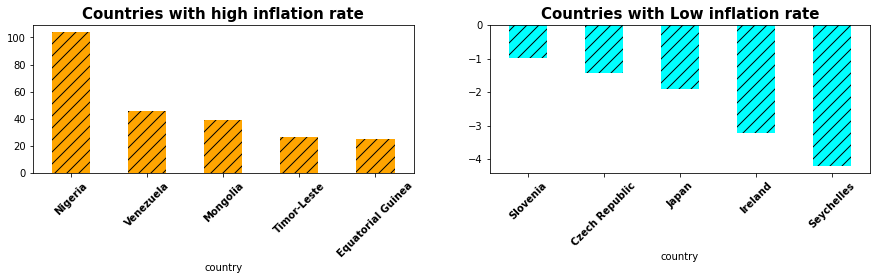

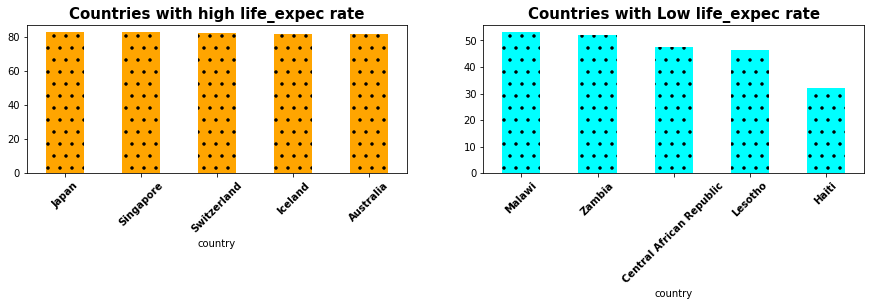

In [23]:
plt.figure(figsize=(15,6))
inflation = country_df.groupby(['country'])['inflation'].sum().sort_values(ascending=False)
life_expec = country_df.groupby(['country'])['life_expec'].sum().sort_values(ascending=False)

plt.subplot(2,2,1)
inflation1=inflation.head(5).plot.bar(color='orange',hatch="//")
plt.title('Countries with high inflation rate',fontweight="bold", size=15)
plt.xticks(rotation = 45,fontweight="bold")

plt.subplot(2,2,2)
inflation1=inflation.tail(5).plot.bar(color='cyan',hatch="//")
plt.title('Countries with Low inflation rate',fontweight="bold", size=15)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
life_expec1=life_expec.head(5).plot.bar(color='orange',hatch=".")
plt.title('Countries with high life_expec rate',fontweight="bold", size=15)
plt.xticks(rotation = 45,fontweight="bold")


plt.subplot(2,2,2)
life_expec1=life_expec.tail(5).plot.bar(color='cyan',hatch=".")
plt.title('Countries with Low life_expec rate',fontweight="bold", size=15)
plt.xticks(rotation = 45,fontweight="bold")

plt.show()




- Nigeria has highest inflation rate therefore the good health rate would be low here and slovenia has the lowest
- Life expectancy is japan is highest and others countries like singapore,switzerland ,australia and iceland also has high life expectancy


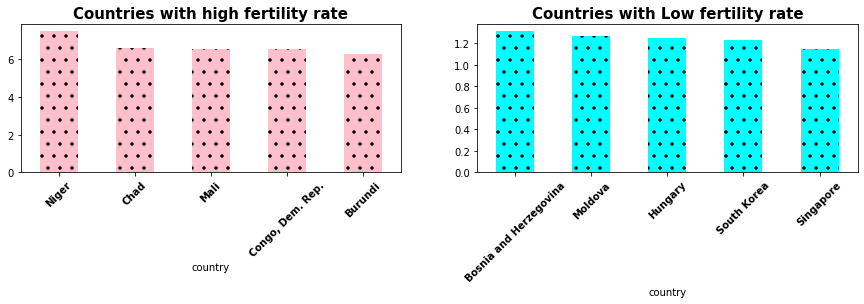

In [24]:
plt.figure(figsize=(15,6))
total_fer = country_df.groupby(['country'])['total_fer'].sum().sort_values(ascending=False)

plt.subplot(2,2,1)
total_fer1=total_fer.head(5).plot.bar(color='pink',hatch=".")
plt.title('Countries with high fertility rate',fontweight="bold", size=15)
plt.xticks(rotation = 45,fontweight="bold")

plt.subplot(2,2,2)
itotal_fer1=total_fer.tail(5).plot.bar(color='cyan',hatch=".")
plt.title('Countries with Low fertility rate',fontweight="bold", size=15)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

- Niger has highest fertility rate 
- Chad and mali has high fertility rate and high child mortality
- Taking look at singapore this country has lowest fertility rate whereas its child mortality is also very low.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

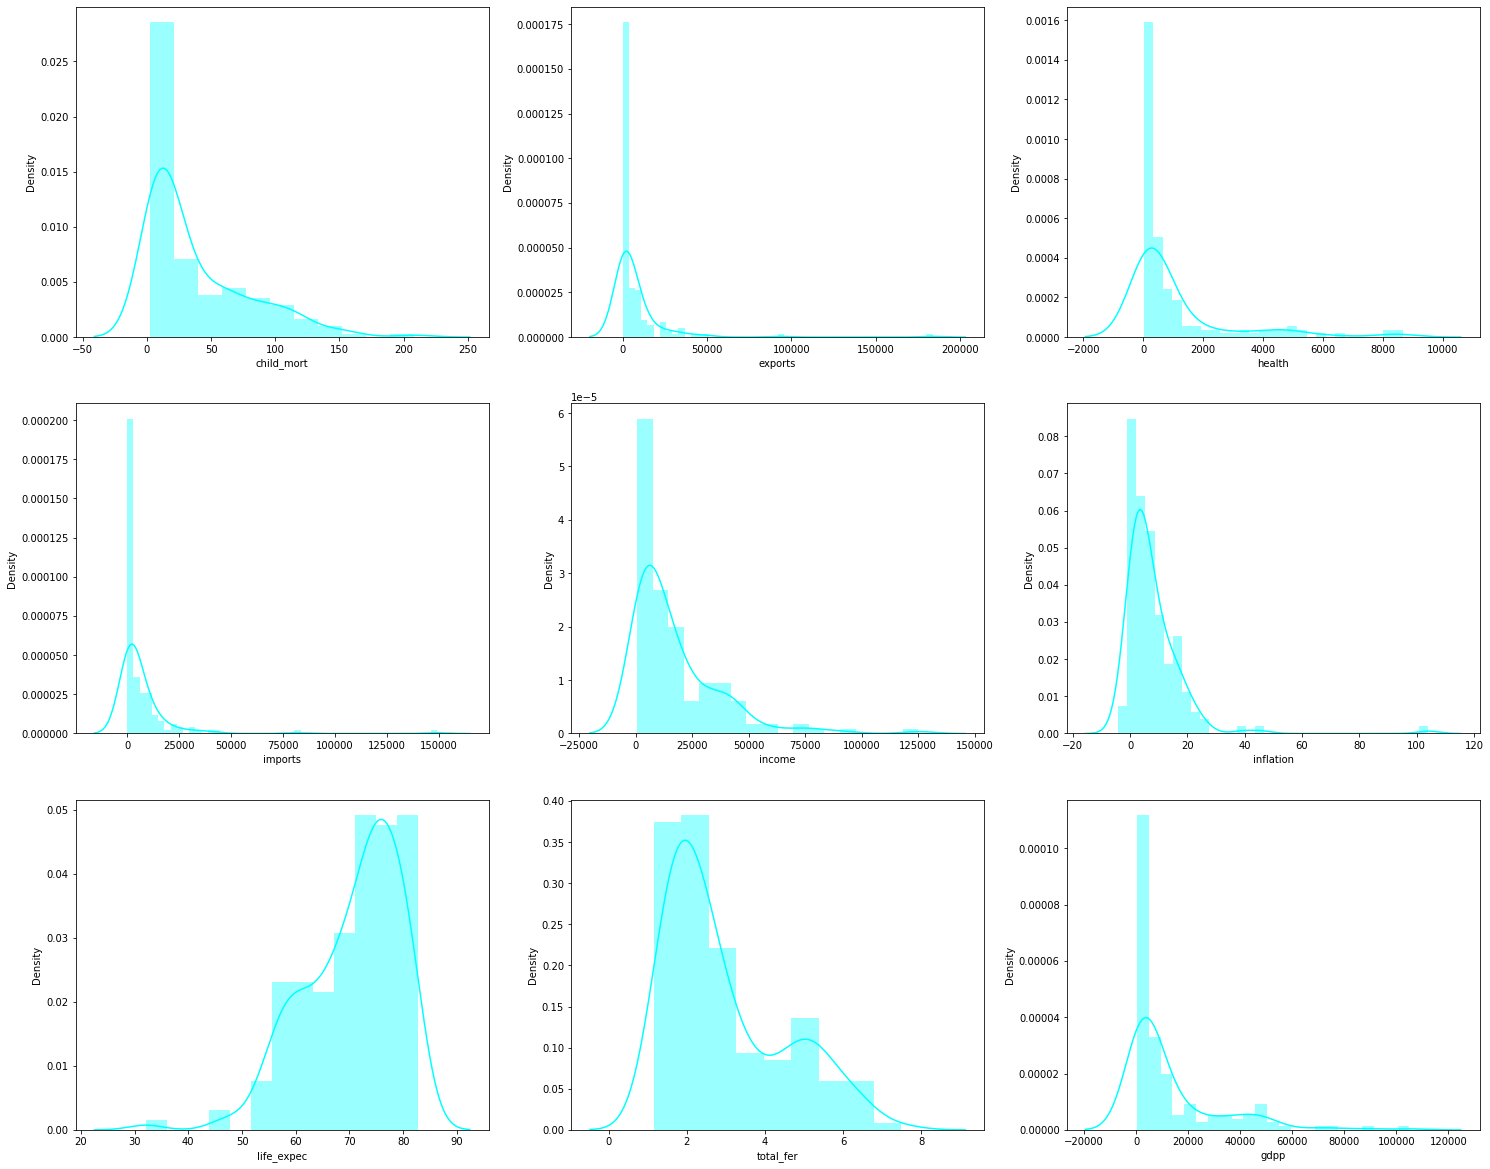

In [25]:
# displot
plt.figure(figsize = (20,16))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(country_df[i[1]], color='cyan')
    plt.subplots_adjust(right=1.1)
    plt.subplots_adjust(top=1.1)

### Outliers Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

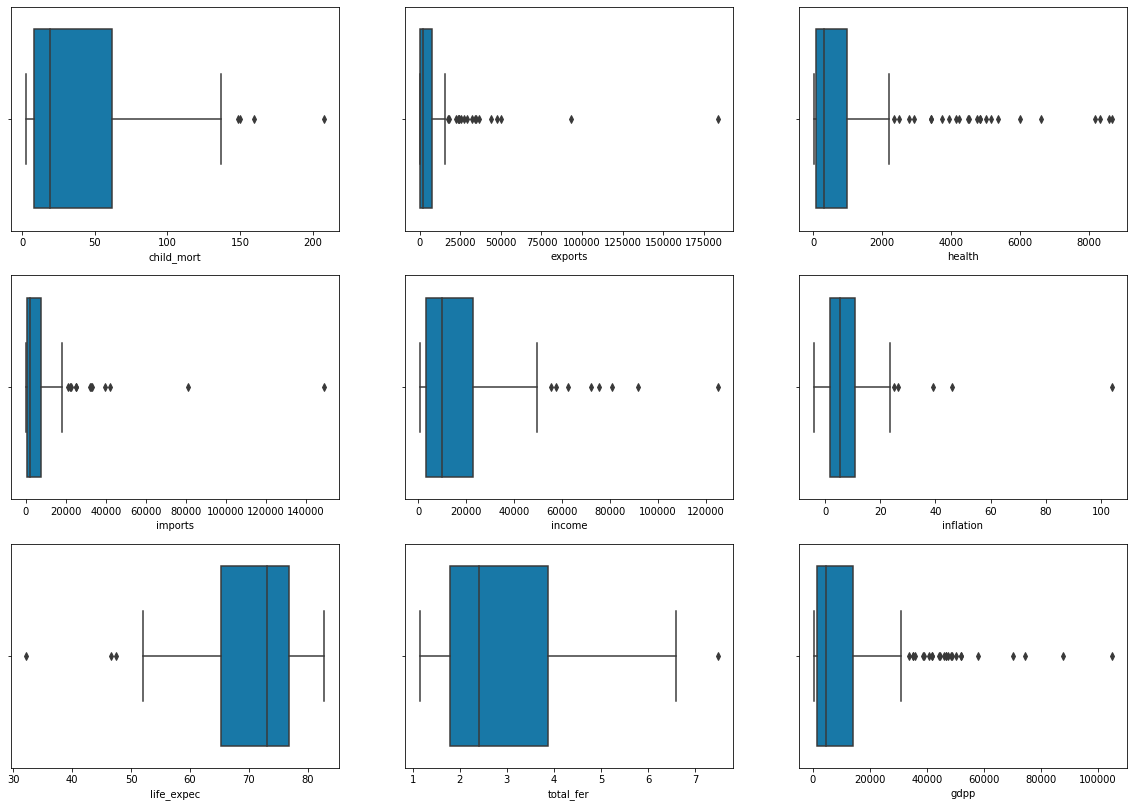

In [26]:
plt.figure(figsize=(20,14))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]],palette='winter')

In [27]:
# treating outliers
#Capping
q2 = country_df['imports'].quantile(0.99)
q3 = country_df['health'].quantile(0.99)
q4 = country_df['income'].quantile(0.99)
q5 = country_df['inflation'].quantile(0.99)
q6 = country_df['life_expec'].quantile(0.99)
q7 = country_df['total_fer'].quantile(0.99)
q8 = country_df['gdpp'].quantile(0.99)

country_df['imports'][country_df['imports']>= q2] = q2
country_df['health'][country_df['health']>= q3] = q3
country_df['income'][country_df['income']>= q4] = q4
country_df['inflation'][country_df['inflation']>= q5] = q5
country_df['life_expec'][country_df['life_expec']>= q6] = q6
country_df['total_fer'][country_df['total_fer']>= q7] = q7
country_df['gdpp'][country_df['gdpp']>= q8] = q8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/l

In [28]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1054.206622,5873.135222,16857.550898,7.380970,70.551138,2.942259,12756.826347
std,40.328931,17973.885795,1790.845342,9422.700869,17957.012855,7.793224,8.886987,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [29]:
country_df1 = country_df.drop(['country'],axis=1)
country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [30]:

#instantiate
Scaler = StandardScaler()

# fit transform
country_df1_scaled = Scaler.fit_transform(country_df1)
country_df1_scaled.shape


(167, 9)

#### Hopkins Statistics

In [31]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
#First convert the numpy array to a dataframe
country_df1_scaled = pd.DataFrame(country_df1_scaled)
country_df1_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.411011,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538949,-0.350191,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272833,-0.318526,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007808,-0.291375,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695634,-0.104331,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


In [33]:
# Using the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_df1_scaled)

0.9121770882698429

- We see that the value of hopkins statistics is 0.86 , so the dataset has high tendency to cluster.

### Making the clusters by using Sklearn's K - means algorithm package.

In [34]:
#converting numpy into dataset
country_df1_scaled = pd.DataFrame(country_df1_scaled )
country_df1_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.411011,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538949,-0.350191,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272833,-0.318526,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007808,-0.291375,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695634,-0.104331,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


### Modelling

In [35]:
# K means with some arbitrary K
kmeans= KMeans(n_clusters=4, max_iter = 50)
kmeans.fit(country_df1_scaled)

KMeans(max_iter=50, n_clusters=4)

In [36]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 3, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

### Finding the Optimal Number of Clusters

### SSD

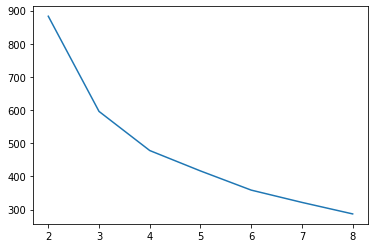

In [37]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(country_df1_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd

sns.lineplot(x=range_n_clusters,y=ssd)
plt.show()

- From above elbow graph we observe that , there is breakpoint at 3 and 4

In [38]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df1_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df1_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.46212139863819196
For n_clusters=3, the silhouette score is 0.4020211360755541
For n_clusters=4, the silhouette score is 0.4043931768049435
For n_clusters=5, the silhouette score is 0.38643503968330495
For n_clusters=6, the silhouette score is 0.28403306035034287
For n_clusters=7, the silhouette score is 0.28757757705363485
For n_clusters=8, the silhouette score is 0.30229090517777263


- We choose n_cluster = 3 by odserving the silhouette curve and elbow curve.


## K- means algorithm

In [39]:
# final model with k=3
kmeans= KMeans(n_clusters=3 , max_iter = 50)
kmeans.fit(country_df1_scaled)

KMeans(max_iter=50, n_clusters=3)

In [40]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [41]:
country_df['cluster_id'] = kmeans.labels_
country_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0,2
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,2
6,Armenia,18.1,669.76,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220.0,2
7,Australia,4.8,10276.20,4530.8700,10847.100,41400.0,1.160,82.0,1.93,51900.0,0
8,Austria,4.3,24059.70,5159.0000,22418.200,43200.0,0.873,80.5,1.44,46900.0,0
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840.0,2


In [42]:
country_df.cluster_id.value_counts()

2    90
1    48
0    29
Name: cluster_id, dtype: int64

- cluster 0 is having highest number of data points as compared to the other two.

### Visualizing  the clusters

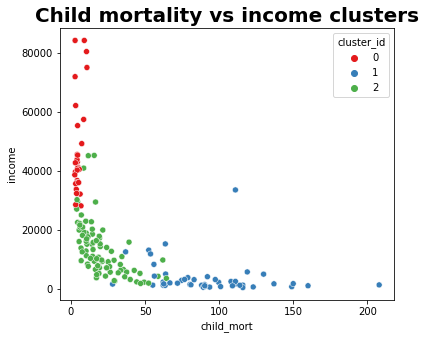

In [43]:
# Plot the cluster
plt.figure(figsize = (6,5))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = country_df, palette = 'Set1')
plt.title('Child mortality vs income clusters',fontweight="bold", size=20)

plt.show()

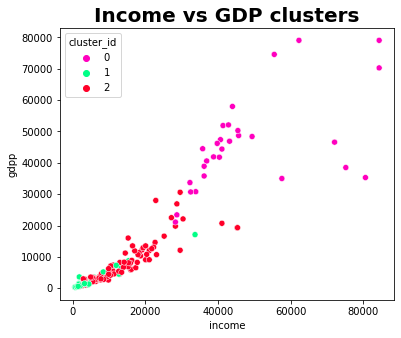

In [44]:
# Plot the cluster
plt.figure(figsize = (6,5))
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_id', data = country_df, palette = 'gist_rainbow_r')
plt.title('Income vs GDP clusters',fontweight="bold", size=20)
plt.show()

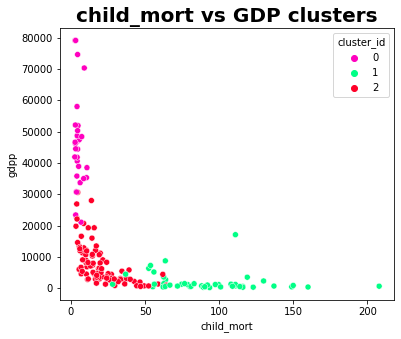

In [45]:
# Plot the cluster
plt.figure(figsize = (6,5))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = country_df, palette = 'gist_rainbow_r')
plt.title('child_mort vs GDP clusters',fontweight="bold", size=20)
plt.show()

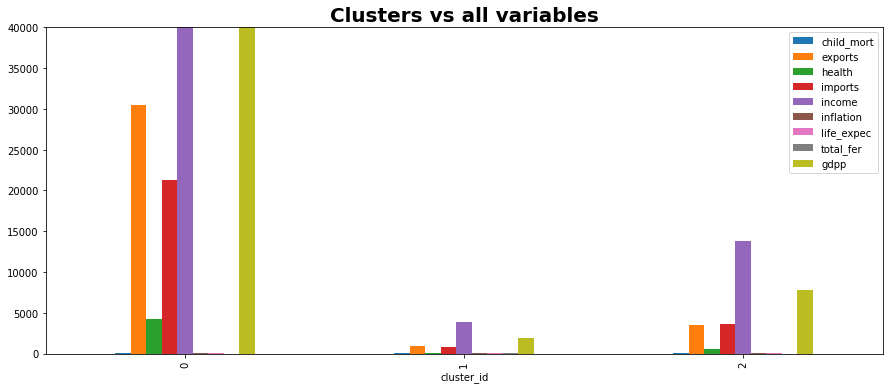

In [46]:
country_df.drop('country', axis = 1).groupby('cluster_id').mean().plot.bar(figsize=(15,6))
plt.ylim([0,40000])
plt.title("Clusters vs all variables",fontweight="bold", size=20)

plt.show()

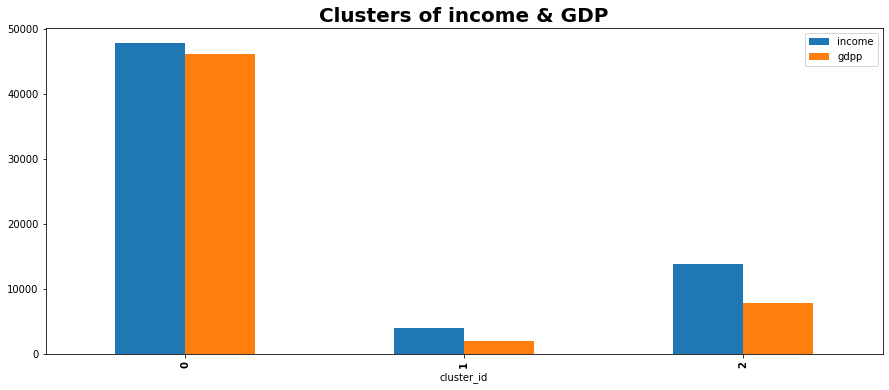

In [47]:
# since cluster property is not that clear we perform following
country_df.drop(['country', 'exports', 'health', 'imports','child_mort',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('cluster_id').mean().plot.bar(figsize=(15,6))
plt.title('Clusters of income & GDP',fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

- Cluster 0 is having highest GDP and high income

- Cluster 2 is having lowest GDP and lowest income

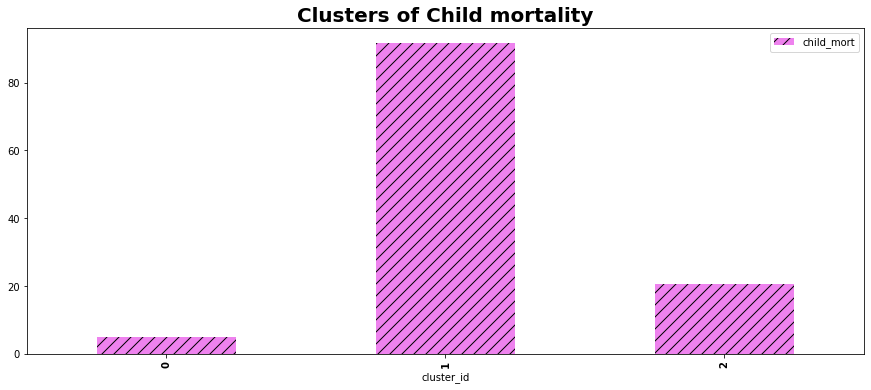

In [48]:
country_df.drop(['country', 'exports', 'health', 'imports','income', 'gdpp',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('cluster_id').mean().plot.bar(figsize=(15,6),color='violet',hatch="//")
plt.title('Clusters of Child mortality', fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

 - Cluster 0 is having low child mortality
 - Cluster 2 is having high child mortality


### We saw in cluster profiling that cluster 0 is having high income and GDP and low Child Mortality  therefore, we can say that countries under cluster 2 are in need of aid because of lowest income and GdP and and high child mortality.

In [49]:
Kmean=country_df[country_df['cluster_id'] == 2]
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,2
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,2
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,2
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,2


In [50]:
K=Kmean[['country']]
K= K.reset_index(drop=True)
K

,country
0,Albania
1,Algeria
2,Antigua and Barbuda
3,Argentina
4,Armenia
...,...
85,Uruguay
86,Uzbekistan
87,Vanuatu
88,Venezuela


In [51]:
##Sorting based on high child mortality,low income and GDP
final=country_df[country_df['cluster_id'] == 2].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True])
final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720.0,7.04,66.8,2.41,988.0,2
154,Turkmenistan,62.0,3387.72000,111.0000,1975.800000,9940.0,2.31,67.9,2.83,4440.0,2
69,India,58.8,305.10000,54.6750,365.850000,4410.0,8.98,66.2,2.60,1350.0,2
146,Tajikistan,52.4,109.96200,44.1324,432.468000,2110.0,12.50,69.6,3.51,738.0,2
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.14,70.4,2.33,758.0,2
109,Nepal,47.0,56.71360,31.0800,215.488000,1990.0,15.10,68.3,2.61,592.0,2
19,Bolivia,46.6,815.76000,95.8320,679.140000,5410.0,8.78,71.6,3.20,1980.0,2
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520.0,3.12,66.1,2.88,786.0,2
18,Bhutan,42.7,926.50000,113.3600,1541.260000,6420.0,5.99,72.1,2.38,2180.0,2
101,"Micronesia, Fed. Sts.",40.0,672.10000,406.1200,2316.600000,3340.0,3.80,65.4,3.46,2860.0,2


#### Following are the top 10 countries that need aid on basis of k_mean algprithm clustering

In [52]:
print("Top 10 countries which are in direst need of aid" )
f=final[['country']].head(10)
df_r = f.reset_index(drop=True)
df_r

Top 10 countries which are in direst need of aid


,country
0,Myanmar
1,Turkmenistan
2,India
3,Tajikistan
4,Bangladesh
5,Nepal
6,Bolivia
7,Cambodia
8,Bhutan
9,"Micronesia, Fed. Sts."


### Hierarchical clustering

In [53]:
country_df1_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.411011,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538949,-0.350191,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272833,-0.318526,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007808,-0.291375,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695634,-0.104331,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


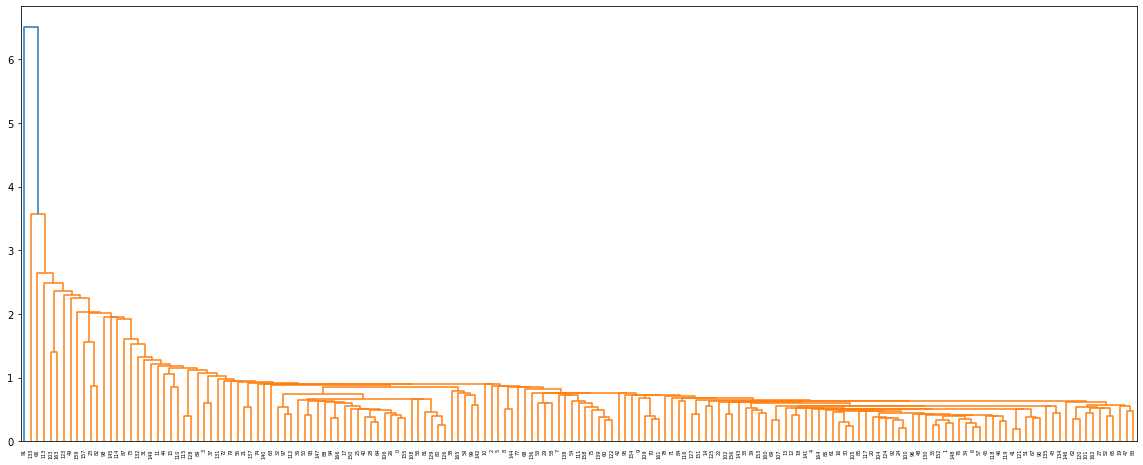

In [54]:
# single linkage
plt.figure(figsize=(20,8))
mergings = linkage(country_df1_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

- We clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

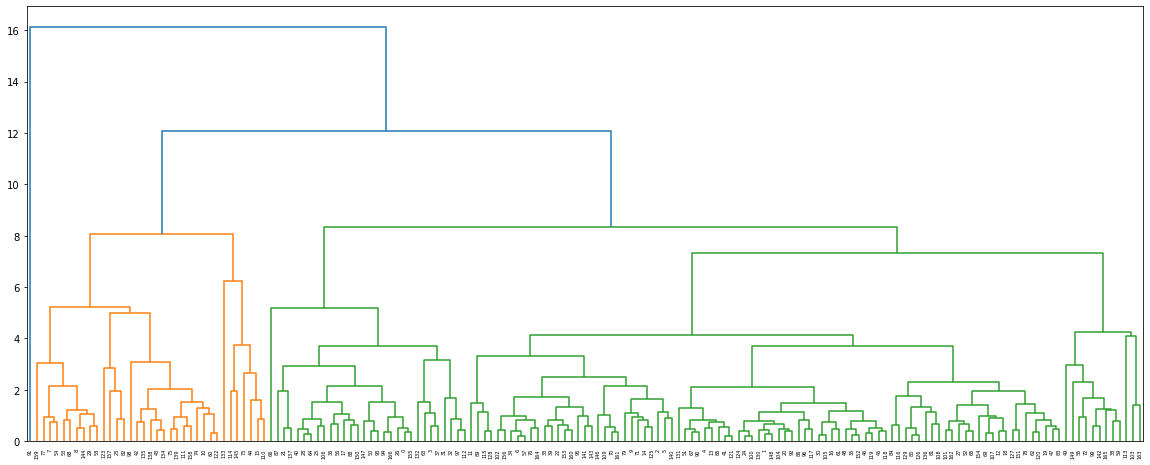

In [55]:
# complete linkage
plt.figure(figsize=(20,8))
mergings = linkage(country_df1_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Here we observe a clear dendrogram and its easier to analyse the clusters. Lets consider a threshold value of 10. Draw the horizontal line at that height. It cuts 3 vertical lines, all of which represent a cluster.
#### So we have 3 clusters .

In [56]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [57]:
country_df['cluster_labels']= cluster_labels
country_df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0,2,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0,2,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0,2,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0,1,0


In [58]:
country_df.cluster_labels.value_counts()

0    131
1     35
2      1
Name: cluster_labels, dtype: int64

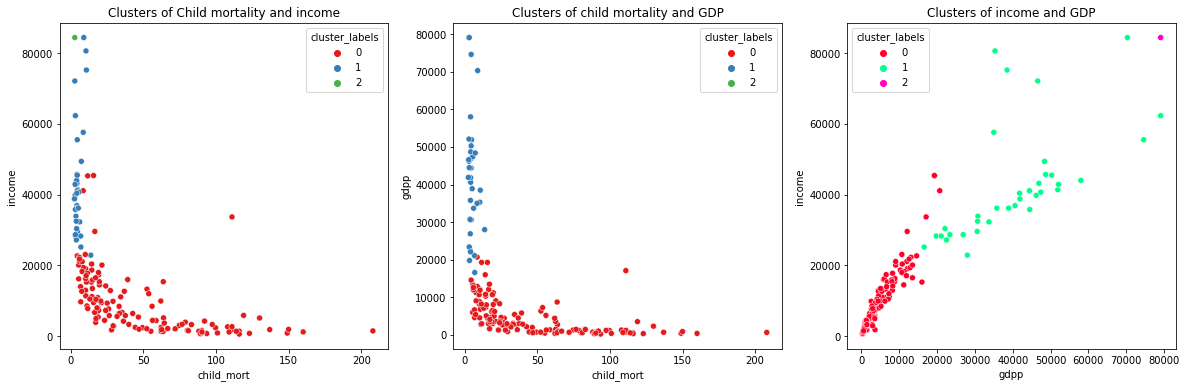

In [59]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_labels',data=country_df, palette='Set1')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_labels',data=country_df, palette='Set1')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',data=country_df,palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.show()

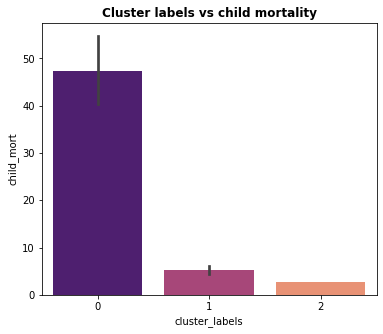

In [60]:
# plots
plt.figure(figsize = (6,5))
sns.barplot(x='cluster_labels', y='child_mort', data=country_df,palette='magma')
plt.title('Cluster labels vs child mortality',fontweight="bold", size=12)

plt.show()

- Cluster 0 is having high child mortality
- Cluster 1 and 2 have very low child mortality

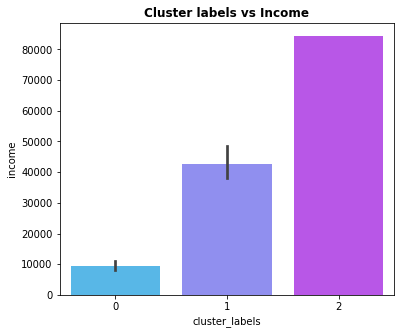

In [61]:
plt.figure(figsize = (6,5))
sns.barplot(x='cluster_labels', y='income', data=country_df, palette='cool')
plt.title('Cluster labels vs Income',fontweight="bold", size=12)

plt.show()

- Cluster 2 is having more income and cluster 1 has modertate income, cluster 0 has very least income

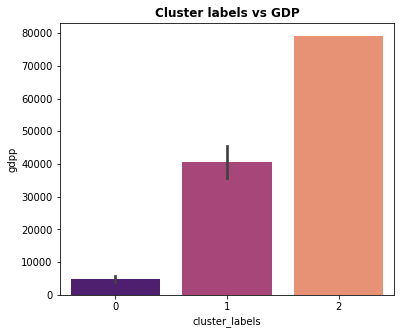

In [62]:
# plots
plt.figure(figsize = (6,5))
sns.barplot(x='cluster_labels', y='gdpp', data=country_df, palette='magma')
plt.title('Cluster labels vs GDP',fontweight="bold", size=12)

plt.show()

- Cluster 0 have very low GDP, cluster 2 have high GDP and cluster 1 has moderte GDP

####  We saw in Hierarchical cluster profiling that cluster 0 is having low income, low GDP and High Child Mortality
####  So we can say that countries under cluster 0 are in need of aid. 


In [63]:
country_df[country_df['cluster_labels'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0


In [64]:
country_df1=country_df[country_df['cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False,True, True])
country_df1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0,1,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,1,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,1,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,1,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0,1,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.8400,2330.0,1,0
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,1,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,1,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,1,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,1,0


In [65]:
print("10 countries which are in direct need of aid based on hierarchical clustering" )
final_hier=country_df1[['country']].head(10)
hier= final_hier.reset_index(drop=True)
hier

10 countries which are in direct need of aid based on hierarchical clustering


,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


### From both K-mean and hierarchical clustering the top 10 countries that are in need of aid are same.


### Final Analysis

In [66]:
Kmean=Kmean.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True])
Kmean.head()     

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720.0,7.04,66.8,2.41,988.0,2
154,Turkmenistan,62.0,3387.72000,111.0000,1975.800000,9940.0,2.31,67.9,2.83,4440.0,2
69,India,58.8,305.10000,54.6750,365.850000,4410.0,8.98,66.2,2.60,1350.0,2
146,Tajikistan,52.4,109.96200,44.1324,432.468000,2110.0,12.50,69.6,3.51,738.0,2
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.14,70.4,2.33,758.0,2


In [67]:
print('10 Countries based on high child mortality, low income and low GDP')
Kmean[['country']].head(10)

10 Countries based on high child mortality, low income and low GDP


,country
107,Myanmar
154,Turkmenistan
69,India
146,Tajikistan
12,Bangladesh
109,Nepal
19,Bolivia
27,Cambodia
18,Bhutan
101,"Micronesia, Fed. Sts."


### Choosing countries on basis of socio-economic and health factors


In [68]:
Kmean.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0
mean,20.547778,3477.015539,528.894338,3588.133568,13804.333333,7.110944,73.393333,2.242444,7808.577778,2.0
std,14.027503,3571.345745,550.816741,3264.954981,9246.444692,7.536422,3.995526,0.677396,6609.880152,0.0
min,3.400000,1.076920,19.463600,0.651092,1990.000000,-4.210000,63.000000,1.230000,592.000000,2.0
25%,10.325000,997.162500,178.038750,1339.535000,6870.000000,1.837500,70.400000,1.620000,3002.500000,2.0
50%,17.300000,1793.405000,354.536000,2348.640000,11150.000000,5.290000,74.050000,2.170000,5430.000000,2.0
75%,26.400000,5005.275000,706.597500,5064.575000,18600.000000,9.602500,76.300000,2.647500,11100.000000,2.0
max,64.400000,14386.500000,2770.700000,12914.800000,45400.000000,41.478000,81.400000,4.340000,30600.000000,2.0


In [69]:
# Here the mean value of the child_mort is 91.61 , so lets take the countries more than this mean value as we are looking at high child mortality rates
country_df_final_list = Kmean[Kmean['child_mort']>91]
country_df_final_list.shape

(0, 11)

In [70]:
country_df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Now Mean value of income is 3639, choosing the countries less than this mean value.
country_df_final_list1 = country_df_final_list[country_df_final_list['income']<3639]
country_df_final_list1.shape

(0, 11)

In [72]:
country_df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Now  the  Mean value of GDP is 698.35 , choosing the countries less than this mean value.
country_df_final_list2 = country_df_final_list1[country_df_final_list1['gdpp']<698]
country_df_final_list2.shape

(0, 11)

In [74]:
country_df_final_list2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id


In [75]:
A_countries=country_df_final_list2['country']
A_countries=A_countries.reset_index(drop=True)
A_countries

Series([], Name: country, dtype: object)

## Inferences:

From the EDA performed we could see that Income, GDP and child Mortality are the major three variables need to be focused

- In K means clustering we got Cluster 2 is having very Low income, very Low GDP but High child mortality. So we concluded that countries under cluster 2 are in need of aid.
- In Hierarchical clustering we saw that Cluster 0 is having the High child mortality, low GDP and very Low child mortality.
- The clusters formed in Hierarchical clustering were not that good. So we went on to consider cluster formed in K means clustering. And got top five countries with High child mortality,Low GDP and Low income
- Then we looked for the countries based on socio economic factors.

In [76]:
# Top 10 countries on basis of K means are
print('Top 10 Countries based on K means clustering:')
Kmean[['country']].head(10)

Top 10 Countries based on K means clustering:


,country
107,Myanmar
154,Turkmenistan
69,India
146,Tajikistan
12,Bangladesh
109,Nepal
19,Bolivia
27,Cambodia
18,Bhutan
101,"Micronesia, Fed. Sts."


In [77]:
# Top 10 countries on basis of socio economic and health factors are
print(' Top 10 Countries based on socio economic and health factors:')
A_countries

 Top 10 Countries based on socio economic and health factors:


Series([], Name: country, dtype: object)

## Final Analysis
  From the analysis performed, We can see that 
1. low income people have high child mortality, so CEO must focus more on low income countries
2. We could also see Low GDP per capita countries are not having much import and export of goods and services. Those countries also must be focused.
3. There are some countries which spend well on health for the people living in that country. For ex: US. Such countries can be skipped. And focus more on Burundi, Congo, Dem. Rep where the total health spending is too less.
4. If the total fertility is less the life expectency is more. Haiti is the country having very low life expectancy, and high child mortality. Its good to have less children per woman,so that they could be looked after well.